<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span></li><li><span><a href="#Clean-&amp;-Explore-Data" data-toc-modified-id="Clean-&amp;-Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean &amp; Explore Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Null Values</a></span></li><li><span><a href="#Negative-Demand" data-toc-modified-id="Negative-Demand-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Negative Demand</a></span></li><li><span><a href="#Datetime" data-toc-modified-id="Datetime-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Datetime</a></span></li></ul></li></ul></li><li><span><a href="#EDA-&amp;-More-Cleaning" data-toc-modified-id="EDA-&amp;-More-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA &amp; More Cleaning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Product Demand</a></span></li><li><span><a href="#Annual-Demand" data-toc-modified-id="Annual-Demand-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Annual Demand</a></span></li><li><span><a href="#Warehouses" data-toc-modified-id="Warehouses-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Warehouses</a></span><ul class="toc-item"><li><span><a href="#Product/Order-Demand" data-toc-modified-id="Product/Order-Demand-4.0.3.1"><span class="toc-item-num">4.0.3.1&nbsp;&nbsp;</span>Product/Order Demand</a></span></li></ul></li><li><span><a href="#Products" data-toc-modified-id="Products-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Products</a></span><ul class="toc-item"><li><span><a href="#Product-Count" data-toc-modified-id="Product-Count-4.0.4.1"><span class="toc-item-num">4.0.4.1&nbsp;&nbsp;</span>Product Count</a></span></li><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.0.4.2"><span class="toc-item-num">4.0.4.2&nbsp;&nbsp;</span>Product Demand</a></span></li><li><span><a href="#Top-100-Products" data-toc-modified-id="Top-100-Products-4.0.4.3"><span class="toc-item-num">4.0.4.3&nbsp;&nbsp;</span>Top 100 Products</a></span></li><li><span><a href="#Top-50-Products" data-toc-modified-id="Top-50-Products-4.0.4.4"><span class="toc-item-num">4.0.4.4&nbsp;&nbsp;</span>Top 50 Products</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.0.4.5"><span class="toc-item-num">4.0.4.5&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Low-Demand-Products" data-toc-modified-id="Low-Demand-Products-4.0.4.6"><span class="toc-item-num">4.0.4.6&nbsp;&nbsp;</span>Low Demand Products</a></span></li><li><span><a href="#Top-Product" data-toc-modified-id="Top-Product-4.0.4.7"><span class="toc-item-num">4.0.4.7&nbsp;&nbsp;</span>Top Product</a></span></li></ul></li><li><span><a href="#Product-Category" data-toc-modified-id="Product-Category-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Product Category</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Build-&amp;-Fit-Baseline-Models" data-toc-modified-id="Build-&amp;-Fit-Baseline-Models-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Build &amp; Fit Baseline Models</a></span><ul class="toc-item"><li><span><a href="#Daily" data-toc-modified-id="Daily-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Daily</a></span></li><li><span><a href="#Weekly" data-toc-modified-id="Weekly-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Weekly</a></span></li><li><span><a href="#Monthly" data-toc-modified-id="Monthly-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Monthly</a></span></li></ul></li><li><span><a href="#Performance-Metrics" data-toc-modified-id="Performance-Metrics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Performance Metrics</a></span><ul class="toc-item"><li><span><a href="#Crossvalidation" data-toc-modified-id="Crossvalidation-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Crossvalidation</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Future Work</a></span></li></ul></li></ul></div>

# Intro

# Import Packages & Data

In [1]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import datetime

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import itertools

# Filter warnings

import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Data

data = pd.read_csv('Historical_Product_Demand.csv')
df = pd.DataFrame(data)

In [4]:
# Preview Data

df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


# Clean & Explore Data

Since we're fitting time series models, we're going to want to change the Date column to be in datetime format and set it as the index. We'll explore a bit first before getting to that. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        999999 non-null object
Warehouse           999999 non-null object
Product_Category    999999 non-null object
Date                988760 non-null object
Order_Demand        999999 non-null int64
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


We can see the 'Date' column has fewer values than the rest of the columns, which indicates missing data. It doesn't look like much of the data are missing, so if they're indeed null, then we can go ahead and drop those rows.

We can also see that basically every category other than 'Order_Demand' are objects. That's totally fine as we will use them to categorize, however our time series will simply be date and demand.

Let's take a look at our summary statistics for order demand.

In [6]:
# Summary statistics
df.describe().round()

,Order_Demand
count,999999.0
mean,5071.0
std,29603.0
min,-999000.0
25%,20.0
50%,300.0
75%,2000.0
max,4000000.0


We can see a large negative value. This could represent a null, but we will be addressing negative values in the next section. 

Let's check for null values. 

### Null Values

In [8]:
df.isnull().any()

Product_Code        False
Warehouse           False
Product_Category    False
Date                 True
Order_Demand        False
dtype: bool

In [9]:
df[df.Date.isnull() == True]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
45460,Product_1461,Whse_A,Category_019,NaN,10000
456373,Product_1636,Whse_A,Category_019,NaN,100
456374,Product_1461,Whse_A,Category_019,NaN,300
456375,Product_1464,Whse_A,Category_019,NaN,300
456376,Product_1388,Whse_A,Category_019,NaN,200
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NaN,-900
995791,Product_1541,Whse_A,Category_019,NaN,-200
995792,Product_1388,Whse_A,Category_019,NaN,-300
995793,Product_1541,Whse_A,Category_019,NaN,-300


We can see Warehouse A has some rows with null values for the date. Since this is a time series we do require the date. We'll remove these rows. 

Let's take a closer look at Warehouse A.

In [11]:
# Subset Warehouse A
df[df.Warehouse == 'Whse_A']

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
34593,Product_0905,Whse_A,Category_023,2012/3/7,50
41029,Product_0097,Whse_A,Category_019,2012/1/18,6000
41030,Product_1496,Whse_A,Category_019,2012/3/13,5000
41031,Product_0097,Whse_A,Category_019,2012/4/16,6000
41032,Product_0097,Whse_A,Category_019,2012/9/24,3900
...,...,...,...,...,...
995797,Product_1822,Whse_A,Category_018,2016/3/1,2
995798,Product_1470,Whse_A,Category_019,2016/5/19,100
995799,Product_0599,Whse_A,Category_017,2016/9/15,12
995800,Product_0599,Whse_A,Category_017,2016/10/26,10


It looks like Warehouse A has plenty of data that doesn't have missing dates. Since we will be conducting a time series model, having the date is essential. We will remove these.

Let's see how much of the data we will be removing:

In [14]:
# Calculate percentage of data that is null 
percent_null = (len(df[df.Date.isnull() == True])/len(df))*100
print("{:.2f}".format(percent_null) + "%")

1.12%


Great, just 1.2%. Let's go ahead and drop the null values.

In [15]:
# Drop rows with NaN values (which were only in Date column)
df = df.dropna()

### Negative Demand

Negative demand indicates returns. Since returns aren't immediately available for shipment, we will not include these in our time series.

Also, since we are using MAPE as an accuracy metric, we need y to be greater than 0. I'm not sure why order demand would show up as 0, however we will be removing those numbers also. 

In [16]:
df[df.Order_Demand <= 0]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
46286,Product_0981,Whse_A,Category_028,2012/6/4,0
46287,Product_0981,Whse_A,Category_028,2012/6/8,0
68611,Product_1250,Whse_A,Category_019,2012/3/9,0
68613,Product_1250,Whse_A,Category_019,2012/5/1,0
68615,Product_1250,Whse_A,Category_019,2012/5/25,0
...,...,...,...,...,...
999552,Product_1646,Whse_S,Category_024,2016/6/6,-11
999553,Product_1847,Whse_S,Category_024,2016/6/6,-3400
999554,Product_2167,Whse_S,Category_024,2016/6/6,-50
999608,Product_1817,Whse_S,Category_006,2016/6/6,-472500


In [18]:
# Calculate percentage of data that is null 
percent_neg_vals = len(df[df.Order_Demand <= 0])/len(df)*100
print("{:.2f}".format(percent_neg_vals) + "%")

3.38%


Luckily this as well represents a relatively small proportion of the data. We will go ahead and remove this as well. 

In [19]:
df = df[df.Order_Demand > 0]

### Datetime

Now we'll set the Date column to datetime format.

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955298 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        955298 non-null object
Warehouse           955298 non-null object
Product_Category    955298 non-null object
Date                955298 non-null datetime64[ns]
Order_Demand        955298 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.7+ MB


Great! Now our Date column is set to datetime format so we can subset our data as needed and create time series from it. Now, to the visual exploration (EDA)!

# EDA & More Cleaning

Let's take a look at product demand for the entire time series. Note: I zoomed in on the x-axis as 2011 data was significantly lower. We'll take a closer look at 2011 following this plot.

### Product Demand

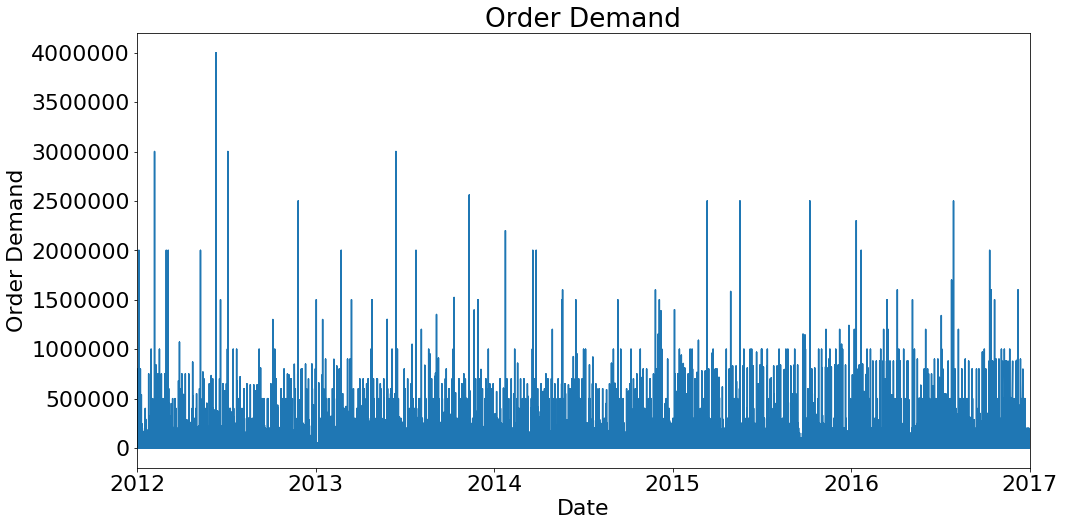

In [21]:
# Plot demand data for entire dataset

# Sort by date first for plotting
df = df.sort_values('Date')

# Set x & y
x = df.Date
y = df.Order_Demand

# Formatting for plots
font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 22}
plt.rc('font', **font)

# Plot
plt.figure(figsize=(16,8))
plt.plot(x, y)

# Title & axis labels
plt.title('Order Demand')
plt.xlabel('Date')
plt.ylabel('Order Demand')

# Set x-axis limits (low demand data for 2011 - may be able to remove this year)
plt.xlim([datetime.date(2012, 1, 1), datetime.date(2017, 1, 1)]);

We can see a really big spike mid 2012. I'm curious why. Perhaps there was a promotion or a new product launch or something similar. The demand seems pretty consistent through out the years with a slight drop in Q3 of 2014. 

Let's get a closer look at 2011 (not pictured here as I intentionally zoomed in on the axis for a better visual of the data). 

### Annual Demand

In [22]:
# Create a time series

# Set index to datetime column 
ts_df = df.set_index('Date')

# Select extra columns to drop (everything except 'Order_Demand')
to_drop = ['Product_Code','Warehouse','Product_Category']
# Drop columns
ts = ts_df.drop(to_drop, axis=1)

In [23]:
# Groupby year
ts_yr = ts.groupby(by=ts.index.year).sum()
ts_yr

,Order_Demand
Date,
2011,7936940
2012,945501449
2013,1011653360
2014,1067725423
2015,1097401540
2016,953826365
2017,294701


We can see that  2011 and 2017 are significantly lower. Let's find out why. First, we'll make a visual. 

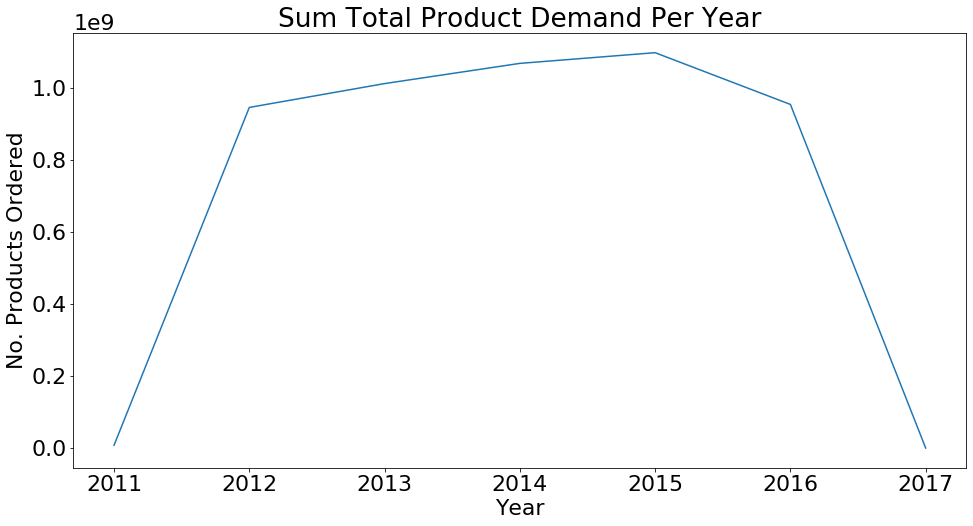

In [24]:
# Plot total product demand vs. year

# Set figure size
plt.figure(figsize=(16,8))
# Plot
plt.plot(ts_yr.index, ts_yr.Order_Demand)
# Title, x & y axis labels
plt.title('Sum Total Product Demand Per Year')
plt.ylabel('No. Products Ordered')
plt.xlabel('Year')
plt.show()

We again can see that demand was significantly lower in 2011 and 2017. I imagine these are either incomplete years or that 2011 was just the beginning, so it took time to gain momentum or perhaps not all of the warehouses were open yet. 

Let's take a closer look to be sure.

In [25]:
# Index time series by year 2011
ts['2011']

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,85000
2011-06-24,7000
2011-09-02,1250
...,...
2011-12-30,2750
2011-12-30,3000
2011-12-30,5000


We can see that for 2011 we do have all dates/the entire year present. This may indicate the beginning/when the warehouse(s) were brand new or just starting out. Now let's take a look at 2017.

In [ ]:
# Index time series by year 2017
ts['2017']

We can see that for this year the data only go through to January 9th, so 2017 is an incomplete year. 

We can see that for those years with data for every day, which are years 2012-2016, the order demand is pretty consistent, with 2012 and 2016 being only slightly lower, and 2017 representing only 9 days of the year. 

So let's go ahead and drop 2011 from our dataset as well as 2017 as it only has data for the first 9 days and is incomplete in terms of weeks or months (which we will be modeling in addition to days).

In [ ]:
# Slice 2012 - 2016
ts_df = ts_df['2012':'2016']
# Preview
display(ts_df.head())
display(ts_df.tail())

Looks great! Now we can get to building our baseline model and predicting overall demand. This should be pretty easy to do as we can already see there seems to be an overall consistent amount of demand year over year with all warehouses combined.

As we move further along we can group by warehouse, and depending how many products there are, we can group by product as well. We already know which warehouses are most productive, as we saw early on when we were cleaning and exploring our data.

Let's go ahead and take a look again.

### Warehouses

#### Product/Order Demand

Let's take a closer look at order demand by warehouse and see if we notice any trends.

A quick explanation here: the variable 'Order_Demand' represents the quantity of a specific product that was ordered from any of the four warehouses.

It seems that each order is represented individually in the dataset.

In [ ]:
# Group by warehouse and sum order demand
wh_demand = ts_df.groupby(by=['Warehouse']).sum().round().sort_values(by=['Order_Demand'], ascending=False)
wh_demand

Let's look at the total percentage of order demand each warehouse represents.

In [ ]:
### Calculate Percentages ###

# Warehouses
whs = ['Whse_J','Whse_S','Whse_C','Whse_A']
# Calc total demand
tot_demand = wh_demand.Order_Demand.sum()
print("Percent of Total Order Demand: \n")
# Calc percentages
for wh in whs:
    demand = wh_demand[wh_demand.index == wh].Order_Demand.values[0]
    percent_demand = (demand/tot_demand)*100
    print(wh + ": {:.2f}".format(percent_demand) + "%")

We can see here that Warehouse J has the most demand by a significant amount (more than 3x the following warehouse). This could be the largest warehouse. While Warehouse A represents the smallest amount at less than 3% of total order demand (sum of all units ordered). 

Let's take a closer look at the summary statistics by warehouse.

In [ ]:
# Summary statistics by warehouse 
ts_df.groupby(by=['Warehouse']).describe().round()

Warehouse J has the most orders. Warehouse J also has the highest product demand. Warehouse A interestingly has the second highest orders, however it has the lowest product demand, making up just 2.8% of all units ordered.

This is interesting. It would mean perhaps that Warehouse A fulfills a high volume of small orders.

Let's visualize these here. We had to use log order demand as the data are spread over a very large range, which causes a lot of outliers.

In [ ]:
# Set figure size
plt.figure(figsize=(16,8))
# Box plot
sns.boxplot(ts_df['Warehouse'], np.log1p(ts_df['Order_Demand']))
plt.show()

As we could see in the summary statistics and can also see in our plot here, Warehouses C and S actually have the highest average demand (product count) per order.

This is interesting as Warehouse J has the highest total product demand. Warehouse A has the lowest total product demand, however it has the highest number of orders. Additionally as just discussed, Warehouses C and S have the highest average product demand per order.

I would be curious to know how big these warehouses are, who they service (who their customers are) and what types of products they carry as well as what metropolitan or otherwise areas they are located in. 

### Products

#### Product Count

Let's see how many products there are in total.

In [ ]:
print(f"There are {len(ts_df.Product_Code.unique())} products")

Let's now take a look at the demand.

#### Product Demand

We're going to sum lifetime product demand by product code and then preview it before visualizing. 

In [ ]:
# Group by product code
prod_sum_demand = ts_df.groupby(by=["Product_Code"]).sum()
# Sort descending 
prod_sum_demand = prod_sum_demand.sort_values(by='Order_Demand', ascending=False)
# Take a look at the top 20
print("Top 20 Products:")
display(prod_sum_demand[0:20])

The top products appear to start out pretty high, possibly exponential and then taper out to a slower more linear decrease. 

Let's go ahead and plot the top 100 products so we can observe the trend visually. 

#### Top 100 Products

In [ ]:
# x-labels
labels = prod_sum_demand.index[0:100]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:100]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=10)
plt.title('Top 100 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

We can see how much the demand for products tapers off. Considering this plot shows lifetime demand as well as only the top 100 out of over 2000, there may be many products with demand lower than what would justify stocking or keeping the product on the floor. 

Let's take a closer look at that.

In [ ]:
# Print 10 lowest demand products
prod_sum_demand.tail(10)

The manufacturer could most likely save costs by freeing up floor space with the elimination of lower demand products. This would make space for more in-demand products and perhaps new products. Or perhaps even downsizing of the facility and staff to only optimize for top producing products.

While this isn't the main focus of this study, I will include it as a recommendation in the future work section. 

#### Top 50 Products

In [ ]:
# x-labels
labels = prod_sum_demand.index[0:50]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:50]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Top 50 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

#### Discussion

**Low Demand Inventory**

We could see in this section visually that a small percentage of available products make up a very large proportion of orders. If we had more detailed information such as profits from each product, we could do a more detailed analysis here to make suggestions on which products to cut from which warehouses.

In an even more detailed analysis it would be good to know footprint of the warehouse as well as number of employees and cost of employees so we could see where things could be culled down and streamlined. How much money can be saved and profits increased. 

If warehouses were to focus on fewer products which make up the greatest amount of orders/profit, could they then hold more stock of the most popular product and increase demand in other ways, such as advertising and saving money on larger purchase orders/more stock/inventory held? 

As this analysis is focused on predicting demand, we will focus on that for now, but will mention the above in future work.

**Top Demand Inventory**

For now let's focus on first modeling and predicting demand for the top most ordered product, and then the model or model-building process can be applied to other products.

Since a warehouse is most likely to run out of the most in-demand product and it is imagined that this would also be one of the most highly profitable products, it makes sense that we would focus on the most ordered product(s) first as these would be the most high-impact products.

#### Low Demand Products

Let's take a closer look at some of the individual lower-demand products to gain insights into the products, categories, warehouses and anything else we may gather.

In [ ]:
bottom_prods = ['Product_1698','Product_1703','Product_0465']
for prod in bottom_prods:
    print(f"{prod}:")
    display(ts_df[ts_df.Product_Code == prod])
    print(f" ")

We can see some of these have pretty sparse orders. For example the first product with one order being in 2012 and the next being in 2016 with only one product per order each.

So far they're all from Warehouse A, which is the second highest producing warehouse, so it wouldn't make sense for them to carry these products that have very little demand, yet take up valuable space.

It would only make sense if they were high paying custom orders or something related. 

Let's take a look at the top product and move forward in our modeling as previously discussed.

#### Top Product

In [ ]:
top_prod = ts_df[ts_df.Product_Code == 'Product_1359']
top_prod = top_prod.sort_values(by=['Date'])
top_prod.head()

In [ ]:
top_prod_demand = top_prod.groupby(by=['Warehouse']).sum().round().sort_values(by=['Order_Demand'], ascending=False)
top_prod_demand

The top product is only at Warehouse J. 

In [ ]:
ts_df[ts_df.Order_Demand <= 0]

In [ ]:
whse_j_prod_demand = ts_df[ts_df.Warehouse == 'Whse_J'].groupby(by=["Product_Code"]).sum().sort_values(by=['Order_Demand'], ascending=False)
whse_j_prod_demand.head(20)

In [ ]:
whse_j_prod_demand[0:100].sum()/whse_j_prod_demand.sum()

In [ ]:
whse_j_prod_demand[0:100].sum()

In [ ]:
whse_j_prod_demand.sum()

In [ ]:
# Calc total demand
tot_demand = whse_j_prod_demand.Order_Demand.sum()
print("Percent of Total Order Demand: \n")

# Calc percent
demand = whse_j_prod_demand[whse_j_prod_demand.index == 'Product_1359'].Order_Demand.values[0]
percent_demand = (demand/tot_demand)*100
print("Product_1359: {:.2f}".format(percent_demand) + "%")

In [ ]:
# Group by product code
prod_sum_demand = whse_j_prod_demand.groupby(by=["Product_Code"]).sum()
# Sort descending 
prod_sum_demand = prod_sum_demand.sort_values(by='Order_Demand', ascending=False)
# Take a look at the top 20
print("Top 20 Products:")
display(prod_sum_demand[0:20])

In [ ]:
# Calculate number of products at warehouse J
tot_prods_whse_j = len(prod_sum_demand)
print(f"N Products at Whse J: {tot_prods_whse_j}")

In [ ]:
# x-labels
labels = prod_sum_demand.index[0:100]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:100]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=10)
plt.title('Top 100 Products at Warehouse J')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

In [ ]:
# x-labels
labels = prod_sum_demand.index[0:50]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:50]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90, fontsize=16)
plt.title('Top 50 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

**Summary Statistics**

In [ ]:
top_prod.describe().round()

The max orders in a day have been just under 10M units, with the 75th percentile being just over 4M, 50th percentile being just over 3M and mean being a bit under 3M. 

The min is -400, which would indicate that there were higher returns than orders. This can be a bit misleading as it doesn't show actual demand for the day, which is more important as inventory forecasting has the purpose of meeting demand. Let's see how much of the data is <= 0 for daily demand. 

In [ ]:
# Calculate % of data with daily product demand <= 0 
print('{:.2f}%'.format(len(top_prod[top_prod.y <=0 ])/len(top_prod)*100))

We can see that 8.71% of the data show <= 0 for daily demand, which isn't that much. We can still get an idea for how much product to have on hand at any given time.

Let's take a look at the distribution for this.

**Distribution**

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(top_prod.y);

We can see that this distribution is bimodal. Often there are small or no orders in a day. However, we have another distrobution where we can see the mean in between 2M & 3M, which we saw from the summary statistics. 

### Product Category

Let's take a closer look at the highest demand product category.

In [ ]:
# Group by product category & sum order demand
top_cat = ts_df.groupby(by=['Product_Category']).sum()
# Sort descending by order demand
top_cat = top_cat.sort_values(by=['Order_Demand'], ascending=False)
# Preview top 5
top_cat.head()

We can see that Category 19 is the most demanded product. This makes sense as it is the category that our most in-demand product  Let's visualize this!

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='Product_Category', 
              data=ts_df,
              order = ts_df['Product_Category'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

Category 19 is by far the most in demand product. We can see it really taper off, especially when the lifetime demand for an entire category over the span of approximately 6 years is less than 100. 

Intuitively I would recommend nixing these products. However, if they are extremely high profit products, they may be able to be justified, however that is a far stretch with such low demand over around 6 years, assuming the products have been there since the beginning. 

Another thing to consider is as these are value counts this is essentially all of the days the products were ordered. There could be different amounts of the product ordered each day, which is represented by 'Order Demand'. We'll take a look at that next.

In [ ]:
# Lifetime demand of each product category

ts_df_cat = ts_df.groupby(by=ts_df.Product_Category).sum()
ts_df_cat = ts_df_cat.sort_values(by='Order_Demand', ascending=False)
ts_df_cat

In [ ]:
# Set variables and labels 

# x-labels
labels = ts_df_cat.index
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = ts_df_cat.Order_Demand

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90)
plt.show()

In [ ]:
# Set figure size
plt.figure(figsize=(16,8))
# Box plot
sns.boxplot(ts_df['Product_Category'], np.log1p(ts_df['Order_Demand']))
plt.xticks(products, labels, rotation = 90)
plt.title('log Average Product Demand Per Order Per Category')
plt.show()

This plot is interesting, because what it shows is that our top producing category (Category 19) actually has fewer demand per order than many other product categories. This would indicate that it is ordered both frequently and perhaps from many different customers. Whatever the products in this category may be it seems they are used by many and frequently. 

# Modeling 

## Build & Fit Baseline Models

### Accuracy Metric

**MAPE**

In order for our model to calculate MAPE, we will need to remove rows where daily demand is <= 0. The reason we're using MAPE, rather than RMSE or simply MAE, is because RMSE and MAE are proportional to the regular demand of a product, which would vary greatly as we apply our model to different products. To keep our accuracy score relatable and relevant amongst different products that we apply our model to, MAPE, which represents percentage, is the best metric to use. 

**Negative Demand**

Negative demand indicates returns were made that day. However, we don't know if the returns logged that day are immediately available to be shipped out. Therefore they are not useful in knowing how much product to have on hand to meet demand.

This is a common issue 

In [ ]:
ts_df_day = ts_df.groupby(pd.Grouper(freq='D')).sum()
ts_df_day

**MOVE THIS TO TOP -- REMOVE FROM DATASET**

In [ ]:
percent_zero_demand = len(ts_df[ts_df.Order_Demand <= 0])/len(ts_df)*100
print("{:.2f}".format(percent_zero_demand) + "%")

In [ ]:
ts_df = ts_df[ts_df.Order_Demand > 0]
ts_df

This was the same number we got when looking at our top product. It
could be returns of our top product, which is ordered in high volumes that affect the daily sum of all products at all warehouses. 



In [ ]:
def ts_model(ts_df, freq='D', periods=365):
    '''
    
    '''
    
    ### Group data by Frequency ###
    
    # Group by frequency
    top_prod = ts_df.groupby(pd.Grouper(freq=freq)).sum()

    # Preview
    print('Time Series Head:')
    display(top_prod.head())
    print('Time Series Tail:')
    display(top_prod.tail())
    
    ### Convert to fbprophet format ###

    # Move datetime index to column
    top_prod.reset_index(inplace=True)
    # Rename columns for fbprophet format
    top_prod = top_prod.rename(columns={'Date':'ds', 'Order_Demand': 'y'})

    ### Instantiate & Fit Model ###

    # Instantiate model
    m = Prophet(interval_width=0.95)
    # Fit model
    m.fit(top_prod)

    ### Forecast & Predict ###

    # Forcasting 3 months into the future
    future = m.make_future_dataframe(periods=periods, freq=freq)
    # Predict
    forecast = m.predict(future)

    ### Preview Forecast ###

    # Head
    print('Forecast Head:')
    display(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].head().round())
    # Tail
    print('Forecast Tail:')
    display(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].tail().round())

    ### Calculate RMSE ###

    # Residuals
    res = top_prod.y - forecast.yhat[:-periods]
    # Residual sum of squares
    rss = np.sum(np.square(res))
    # Mean squared error
    mse = rss/len(res)
    # Root mean squared error
    rmse = np.sqrt(mse)
    # Print
    print(f"RMSE: {rmse.round()} \n")

    ### Plot Time Series & Components ###

    # Plot forecast
    print('Time Series Forecast:')
    figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
    # Add change points
    a = add_changepoints_to_plot(figure1.gca(), m, forecast)
    plt.show()
    # Plot components
    print('Time Series Components:')
    figure2 = m.plot_components(forecast)
    plt.show()

    return

### Daily 

Apply function to model daily demand forecast.

In [ ]:
ts_model(ts_df, freq='D', periods=365)

**RMSE: 1148398.0**

**Trend**

We can see there is a series of changepoints surrounding the beginning of 2015. This relates to the overall trend we can see in the decomposition trend plot. 

The trend increases linearly peaking in 2015 and then linearly decreases.

This could have been the introduction of a new product that peaked before trending downward in its product lifecycle. This could have been a change in industry trends. This could have been due to competitor product(s). This could have been the result of a marketing or promotional campaign. There are many possibilities.

We don't have much information on this dataset other than it coming from a manufacturer with four worldwide warehouses. 

**Weekly**

It appears there is a peak in demand/orders on Tuesday, followed closely by Monday, with Wednesday being the slowest day and negative demand (which could indicate returns) on the weekends. This seems to follow a Monday - Friday business day schedule. 

**Yearly**

There appear to be peaks in December and February, before and after the holidays and new year, with the lowest amount of demand in January. 

### Weekly 

Apply function to model weekly demand forecast.

In [ ]:
ts_model(ts_df, freq='W', periods=52)

**RMSE: 3407993.0**

We can see the same trends here as the daily projections, however the RMSE for weekly is much higher (almost 300%) than the daily. Therefore daily demand is a more accurate prediction metric for this model. 

### Monthly 

Apply function to model monthly demand forecast.

In [ ]:
ts_model(ts_df, freq='M', periods=12)

**RMSE: 4998711.0**

We can see the 2015 changepoint most clearly here. One thing to note is that by looking on a monthly basis rather than daily or weekly, the yearly trends have shifted.

We can also see the RMSE is the highest for this model.

**Model Selection**

With the lowest RMSE by a significant amount, we will go with daily forecasting for our time series model, and do our best to tune it below.

## Performance Metrics

While we have looked at RMSE, we will also crossvalidate and perform a gridsearch to find optimal values for our hyperparameters. We will plot RMSE and take a look at MAE as well (mean absolute error). 

### Crossvalidation

In [ ]:

### Cross validation ##
top_prod = ts_df.groupby(pd.Grouper(freq='D')).sum()
# Move datetime index to column
top_prod.reset_index(inplace=True)
# Rename columns for fbprophet format
top_prod = top_prod.rename(columns={'Date':'ds', 'Order_Demand': 'y'})

### Instantiate & Fit Model ###

# Instantiate model
m = Prophet(interval_width=0.95)
# Fit model
m.fit(top_prod)


top_prod_d_cv = cross_validation(m, initial='365.25 days', period='365.25 days', horizon = '365.25 days')

# Performance metrics
top_prod_p = performance_metrics(top_prod_d_cv)

# RMSE
min_rmse = top_prod_p.sort_values(by=['rmse']).head(1)['rmse'].round().values[0]
max_rmse = top_prod_p.sort_values(by=['rmse'], ascending=False).head(1)['rmse'].round().values[0]

# Print
print(f'Min RMSE: {min_rmse}')
print(f'Max RMSE: {max_rmse}')

### Plot Metrics ###

fig = plot_cross_validation_metric(top_prod_d_cv, metric='rmse')#, rolling_window=.2)
plt.title('RMSE')
plt.show()

We can see here that the prediction error (RMSE) for our model ranges from 961842.0 - 1463890.0 depending on the horizon or days into the future that we're predicting.

Let's take a closer look.

In [ ]:
# Prediction metrics for min RMSE
top_prod_p.sort_values(by=['rmse']).head(1)

We can see that the optimal prediction horizon is 324 days. Therefore we can say that our model most accurately predicts 324 days into the future. 

### Hyperparameter Tuning

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [3, 5, 10, 15],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(top_prod)  # Fit model with given params
    df_cv = cross_validation(m, horizon='365.25 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

None of these appear to improve the model as we can see with the relatively RMSE values. We can however test them out. 

In [ ]:
# Instantiate model with chosen hyperparameters
m = Prophet(interval_width = 0.95,
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            changepoint_prior_scale = 0.5,
            seasonality_prior_scale=10
            )

# Add holidays
m.add_country_holidays(country_name='US')
# Fit model
m.fit(top_prod)

# Forcast 324 days into the future
future = m.make_future_dataframe(periods=324, freq='D')
forecast = m.predict(future)

display(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].tail().round())

figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
a = add_changepoints_to_plot(figure1.gca(), m, forecast)
figure2 = m.plot_components(forecast)

We can really see in comparison to our trend plot how the changepoints have really captured the trend. We can see this did increase the undertainty, which could indicate that our model is overfitting due to our tuning. 

In [ ]:
# Calculate RMSE
res = top_prod.y - forecast.yhat[:-324]
rss = np.sum(np.square(res))
mse = rss/len(res)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse.round()}")

We were able to improve the model slightly, by approximately 20,000 units per day more accurate, however we may be overfitting the model here. 

I'm curious now to see what the summary statistics are for daily demand of this product.

In [ ]:
top_prod_d_cv = cross_validation(m, initial='365.25 days', period='365.25 days', horizon = '365.25 days')
display(top_prod_d_cv.head())
display(top_prod_d_cv.tail())

top_prod_p = performance_metrics(top_prod_d_cv)
print('Min MAE:')
display(top_prod_p.sort_values(by=['mae']).head())
print('Min RMSE:')
display(top_prod_p.sort_values(by=['rmse']).head())

fig = plot_cross_validation_metric(top_prod_d_cv, metric='mae')
plt.title('Cross Validation : MAE')
plt.show()
fig = plot_cross_validation_metric(top_prod_w_cv, metric='rmse')
plt.title('Cross Validation : RMSE')
plt.show()

# Conclusion

## Results

## Recommendations

## Future Work